#### Load tensorflow

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#### Collect Data

We will use MNIST dataset for this exercise. This dataset contains images of hand written numbers with each image being a black & white picture of size 28x28. We will download the data using tensorflow API. The dataset has 60,000 training examples and 10,000 test examples. Please note that images have already been converted to numpy arrays.

In [2]:
#Download dataset
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
#Check number of training examples and size of each example
X_train.shape

(60000, 28, 28)

In [4]:
#Check number of test examples and size of each example
X_test.shape

(10000, 28, 28)

Visualize data

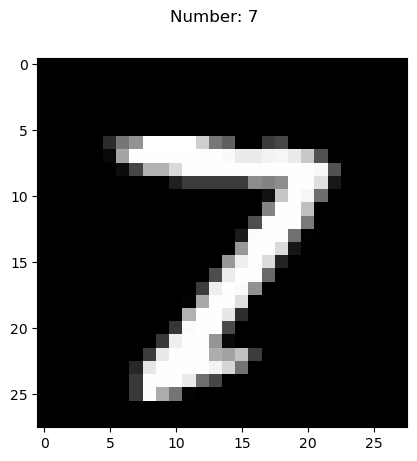

In [5]:
img_num = np.random.randint(0, X_test.shape[0]) #Get a random integer between 0 and number of examples in test dataset
plt.imshow(X_test[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(y_test[img_num]))
plt.show()

#### Prepare Labels
Convert Output label to multiple values

In [6]:
#Label for an example
y_test[0]

7

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [8]:
#Label for same example after one hot encoding
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
small_X_train = X_train[0:1000]

In [11]:
small_X_train.shape

(1000, 28, 28)

In [12]:
small_y_train = y_train[0:1000]

In [13]:
small_y_train.shape

(1000, 10)

#### Build the Graph

In [23]:
#Initialize Sequential model
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [24]:
model.output

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'batch_normalization')>

Add Hidden Layers

In [25]:
#Add 1st hidden layer - check by changing the activation function to softmax
model.add(tf.keras.layers.Dense(200, activation='relu'))

In [26]:
model.output

<KerasTensor: shape=(None, 200) dtype=float32 (created by layer 'dense')>

In [27]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [28]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

In [29]:
#model.add(tf.keras.layers.LeakyReLU(0.03))
#change activation to sigmoid and use optimizer = 'adam'

In [30]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [31]:
model.output

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'batch_normalization_2')>

In [32]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))

In [33]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [34]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))

In [35]:
model.output

<KerasTensor: shape=(None, 30) dtype=float32 (created by layer 'dense_3')>

In [36]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

Add Output Layer

In [37]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Compile the Model

In [38]:
#Compile the model
# sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)

# model.compile(optimizer='adam', loss='categorical_crossentropy', 
#               metrics=['accuracy'])

sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', 
              metrics=['accuracy'])


Review model

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 batch_normalization_1 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)              4

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 batch_normalization_1 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)              4

#### Train the model

In [41]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('mnist_batchnorm_v1.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [42]:
model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=3,
          batch_size=32, 
          callbacks=[model_checkpoint])

Epoch 1/3


2024-03-16 05:57:18.942790: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-03-16 05:57:19.218857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1873/1875 [============================>.] - ETA: 0s - loss: 1.2030 - accuracy: 0.6408

2024-03-16 05:57:59.156626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.82890, saving model to mnist_batchnorm_v1.h5
1875/1875 [==============================] - 44s 22ms/step - loss: 1.2024 - accuracy: 0.6410 - val_loss: 0.8188 - val_accuracy: 0.8289
Epoch 2/3
1875/1875 [==============================] - ETA: 0s - loss: 0.6252 - accuracy: 0.8367
Epoch 2: val_accuracy improved from 0.82890 to 0.88220, saving model to mnist_batchnorm_v1.h5
1875/1875 [==============================] - 40s 22ms/step - loss: 0.6252 - accuracy: 0.8367 - val_loss: 0.6540 - val_accuracy: 0.8822
Epoch 3/3
1874/1875 [============================>.] - ETA: 0s - loss: 0.4801 - accuracy: 0.8708
Epoch 3: val_accuracy improved from 0.88220 to 0.90270, saving model to mnist_batchnorm_v1.h5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4802 - accuracy: 0.8708 - val_loss: 0.5075 - val_accuracy: 0.9027


In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('mnist_batchnorm_v1.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [ ]:
model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=15,
          batch_size=32, 
          callbacks=[model_checkpoint])

In [ ]:
model.save('mnist_batchnorm_v1.h5')

In [ ]:
!ls -l

Load a saved model

In [ ]:
model = tf.keras.models.load_model('mnist_v1.h5')

In [ ]:
model.summary()

### Model Prediction

In [ ]:
model.predict(testX[0])

In [ ]:
import numpy as np

What input shape model is expecting?

In [ ]:
model.input

Predicting on first example

In [ ]:
testX[0].shape

In [ ]:
model.predict(testX[0])

Why are we getting the error?

In [ ]:
testX[0].shape

Building a Batch

In [ ]:
input_data = np.expand_dims(testX[0], axis=0)
input_data.shape

Model Prediction

In [ ]:
pred = model.predict(input_data)

In [ ]:
pred.shape

In [ ]:
pred

In [ ]:
pred[0]

Predicted Class

In [ ]:
np.argmax(pred[0])

In [ ]:
np.max(pred[0])

Actual Class

In [ ]:
np.argmax(testY[0])

Visual confirmation

In [ ]:
#Lets print the image as well
import matplotlib.pyplot as plt
plt.imshow(testX[0],cmap='gray')
plt.show()